In [2]:
import os
os.chdir("/data/t-achetan/adv_geom/src")

import torch
import numpy as np

import matplotlib.pyplot as plt

from datagen.synthetic.multiple import concentricspheres, intertwinedswissrolls, wellseparatedspheres

# Concentric Spheres

In [3]:
train_cfg_dict = {
    "N": 200000,
    "num_neg": 100000,
    "n": 2,
    "k": 2,
    "r": 1.0,
    "g": 0.8,
    "D": 0.07,
    "max_norm": 0.3,
    "mu": 0,
    "sigma": 1,
    "seed": 23,
    "normalize": True,
    "norm_factor": 1,
    "bp": 0.09,
    "M": 1,
    "inferred": True,
    "online": False,
    "off_online": False,
    "augment": False,
    "max_t_delta": 1e-3,
    "recomp_tn": False,
    "gamma": 0,
    "cache_dir": "/mnt/t-achetan/data_cache/train/"
}

In [4]:
cc = concentricspheres.ConcentricSpheres(**train_cfg_dict)

In [5]:
cc.compute_points()

18-05-2022 06:39:02 -- [I] root >> [RandomSphere]: generated centre
18-05-2022 06:39:02 -- [I] root >> [RandomSphere]: generated points in k-dim
18-05-2022 06:39:02 -- [I] root >> [ConcentricSpheres]: Generated S1
18-05-2022 06:39:02 -- [I] root >> [RandomSphere]: generated centre
18-05-2022 06:39:02 -- [I] root >> [RandomSphere]: generated points in k-dim
18-05-2022 06:39:02 -- [I] root >> [ConcentricSpheres]: Generated S2
18-05-2022 06:39:02 -- [I] root >> [ConcentricSpheres]: made poca_idx
18-05-2022 06:39:02 -- [I] root >> [ConcentricSpheres]: collect on-mfld k-dim points from both spheres
18-05-2022 06:39:02 -- [I] root >> initial setup complete
18-05-2022 06:39:02 -- [I] root >> [ConcentricSpheres]: knn not computed. computing now ...
18-05-2022 06:39:02 -- [I] root >> [ConcentricSpheres]: use_new == False
18-05-2022 06:39:02 -- [I] root >> [ConcentricSpheres]: fitting knn...
18-05-2022 06:39:05 -- [I] root >> [ConcentricSpheres]: knn fit done
18-05-2022 06:39:05 -- [I] root >> [

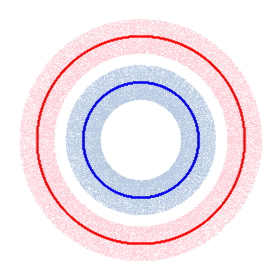

In [22]:
plt.figure(figsize=(4, 4))
plt.scatter(cc.normed_all_points[cc.class_labels == 2][:cc.S1.genattrs.num_neg, 0], cc.normed_all_points[cc.class_labels == 2][:cc.S1.genattrs.num_neg, 1], s=0.01, c="lightsteelblue")
plt.scatter(cc.normed_all_points[cc.class_labels != 2][:cc.S1.genattrs.N - cc.S1.genattrs.num_neg, 0], cc.normed_all_points[cc.class_labels != 2][:cc.S1.genattrs.N - cc.S1.genattrs.num_neg, 1], s=0.01, c="blue")

plt.scatter(cc.normed_all_points[cc.class_labels == 2][cc.S1.genattrs.num_neg:, 0], cc.normed_all_points[cc.class_labels == 2][cc.S1.genattrs.num_neg:, 1], s=0.01, c="pink")
plt.scatter(cc.normed_all_points[cc.class_labels != 2][cc.S1.genattrs.N - cc.S1.genattrs.num_neg:, 0], cc.normed_all_points[cc.class_labels != 2][cc.S1.genattrs.N - cc.S1.genattrs.num_neg:, 1], s=0.01, c="red")



plt.axis("off")
plt.tight_layout()
plt.savefig("repr_cc.png", type="png")
plt.show()

# Swiss Roll

In [13]:
train_cfg = {
    "N": 200000,
    "num_neg": None,
    "n": 2,
    "k": 2,
    "D": 0.2,
    "max_norm": 0.4,
    "contract": 1,
    "mu": 0,
    "sigma": 1,
    "seed": 23,
    "gamma": 0.5,
    "t_min": 1.5,
    "t_max": 4.5,
    "num_turns": None,
    "omega": np.pi,
    "inferred": True,
    "online": False,
    "off_online": False,
    "augment": False
}

In [14]:
sw = intertwinedswissrolls.IntertwinedSwissRolls(**train_cfg)
sw.compute_points()

18-05-2022 06:48:07 -- [I] root >> [RandomSwissRoll]: swiss roll attribute setup done
18-05-2022 06:48:07 -- [I] root >> [RandomSwissRoll]: generated points in k-dim
18-05-2022 06:48:07 -- [I] root >> [IntertwinedSwissRolls]: Generated S1
18-05-2022 06:48:07 -- [I] root >> [RandomSwissRoll]: swiss roll attribute setup done
18-05-2022 06:48:07 -- [I] root >> [RandomSwissRoll]: generated points in k-dim
18-05-2022 06:48:07 -- [I] root >> [IntertwinedSwissRolls]: Generated S2
18-05-2022 06:48:07 -- [I] root >> [IntertwinedSwissRolls]: made poca_idx
18-05-2022 06:48:07 -- [I] root >> [IntertwinedSwissRolls]: collect on-mfld k-dim points from both spheres
18-05-2022 06:48:07 -- [I] root >> initial setup complete
18-05-2022 06:48:07 -- [I] root >> [IntertwinedSwissRolls]: knn not computed. computing now ...
18-05-2022 06:48:07 -- [I] root >> [IntertwinedSwissRolls]: use_new == False
18-05-2022 06:48:07 -- [I] root >> [IntertwinedSwissRolls]: fitting knn...
18-05-2022 06:48:07 -- [I] root >> 

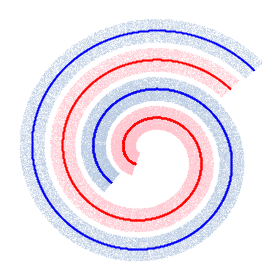

In [23]:
plt.figure(figsize=(4, 4))
plt.scatter(sw.normed_all_points[sw.class_labels == 2][:sw.S1.genattrs.num_neg, 0], sw.normed_all_points[sw.class_labels == 2][:sw.S1.genattrs.num_neg, 1], s=0.01, c="lightsteelblue")
plt.scatter(sw.normed_all_points[sw.class_labels != 2][:sw.S1.genattrs.N - sw.S1.genattrs.num_neg, 0], sw.normed_all_points[sw.class_labels != 2][:sw.S1.genattrs.N - sw.S1.genattrs.num_neg, 1], s=0.01, c="blue")

plt.scatter(sw.normed_all_points[sw.class_labels == 2][sw.S1.genattrs.num_neg:, 0], sw.normed_all_points[sw.class_labels == 2][sw.S1.genattrs.num_neg:, 1], s=0.01, c="pink")
plt.scatter(sw.normed_all_points[sw.class_labels != 2][sw.S1.genattrs.N - sw.S1.genattrs.num_neg:, 0], sw.normed_all_points[sw.class_labels != 2][sw.S1.genattrs.N - sw.S1.genattrs.num_neg:, 1], s=0.01, c="red")

plt.axis("off")
plt.tight_layout()
plt.savefig("repr_sw.png", type="png")
plt.show()

# Well Separated Spheres

In [24]:
train_cfg_dict = {
    "N": 200000,
    "num_neg": 100000,
    "n": 2,
    "k": 2,
    "r": [1.0, 1.0],
    "D": 0.07,
    "max_norm": 0.14,
    "mu": 0,
    "sigma": 1,
    "seed": 23,
    "normalize": True,
    "norm_factor": 1,
    "bp": 0.09,
    "M": 1,
    "inferred": True,
    "online": False,
    "off_online": False,
    "augment": False,
    "max_t_delta": 1e-3,
    "recomp_tn": False,
    "gamma": 0,
    "c_dist": 2.5,
    "cache_dir": "/mnt/t-achetan/data_cache/train/"
}

In [25]:
ws = wellseparatedspheres.WellSeparatedSpheres(**train_cfg_dict)
ws.compute_points()

18-05-2022 06:55:06 -- [I] root >> [RandomSphere]: generated centre
18-05-2022 06:55:06 -- [I] root >> [RandomSphere]: generated points in k-dim
18-05-2022 06:55:06 -- [I] root >> [WellSeparatedSpheres]: Generated S1
18-05-2022 06:55:06 -- [I] root >> [RandomSphere]: generated centre
18-05-2022 06:55:06 -- [I] root >> [RandomSphere]: generated points in k-dim
18-05-2022 06:55:06 -- [I] root >> [WellSeparatedSpheres]: Generated S2
18-05-2022 06:55:06 -- [I] root >> [WellSeparatedSpheres]: made poca_idx
18-05-2022 06:55:06 -- [I] root >> [WellSeparatedSpheres]: collect on-mfld k-dim points from both spheres
18-05-2022 06:55:06 -- [I] root >> initial setup complete
18-05-2022 06:55:06 -- [I] root >> [WellSeparatedSpheres]: knn not computed. computing now ...
18-05-2022 06:55:06 -- [I] root >> [WellSeparatedSpheres]: use_new == False
18-05-2022 06:55:06 -- [I] root >> [WellSeparatedSpheres]: fitting knn...
18-05-2022 06:55:06 -- [I] root >> [WellSeparatedSpheres]: knn fit done
18-05-2022 0

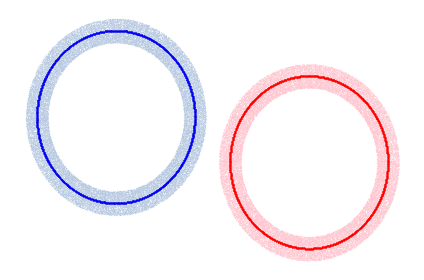

In [35]:
plt.figure(figsize=(6, 4))
plt.scatter(ws.normed_all_points[ws.class_labels == 2][:ws.S1.genattrs.num_neg, 0], ws.normed_all_points[ws.class_labels == 2][:ws.S1.genattrs.num_neg, 1], s=0.01, c="lightsteelblue")
plt.scatter(ws.normed_all_points[ws.class_labels != 2][:ws.S1.genattrs.N - ws.S1.genattrs.num_neg, 0], ws.normed_all_points[ws.class_labels != 2][:ws.S1.genattrs.N - ws.S1.genattrs.num_neg, 1], s=0.01, c="blue")

plt.scatter(ws.normed_all_points[ws.class_labels == 2][ws.S1.genattrs.num_neg:, 0], ws.normed_all_points[ws.class_labels == 2][ws.S1.genattrs.num_neg:, 1], s=0.01, c="pink")
plt.scatter(ws.normed_all_points[ws.class_labels != 2][ws.S1.genattrs.N - ws.S1.genattrs.num_neg:, 0], ws.normed_all_points[ws.class_labels != 2][ws.S1.genattrs.N - ws.S1.genattrs.num_neg:, 1], s=0.01, c="red")

plt.axis("off")
plt.tight_layout()
plt.savefig("repr_wss.png", type="png")
plt.show()

In [38]:
isinstance(ws, wellseparatedspheres.WellSeparatedSpheres)

True